# Polygon to footprint border distance

Could be ueseful to select the poloygons to be used for extraction in the overlapping areas - to avoid duplicates.

Might be smart to prefer polygons that are far away from the footprint border, e.g. because of expectedly more cloud detection issues.

However, it might be easier to later extract all polygons per tile, calculate the distance to polygon border on pixel level (``gdal_proximity`` is already implemented) together with the coordinates and polygon IDs and select the samples to be used then...

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import geopandas as gpd
import pandas as pd
from pathlib import Path

from src import configs
prjconf = configs.ProjectConfigParser()
tilenames = prjconf.get("Params", "tiles").split(" ")
tilenames

['32UNU', '32UPU', '32UQU', '33UUP']

## Sample data to play with

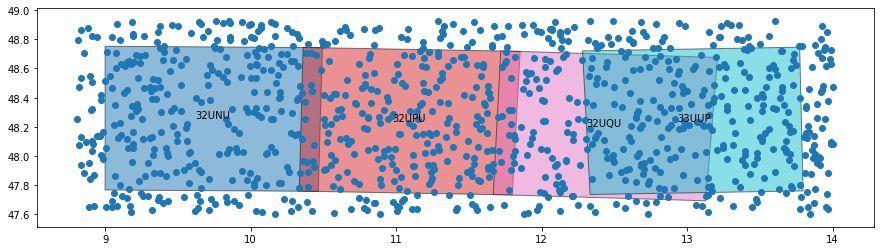

In [9]:
tile_footprints = prjconf.get_footprints()
points = gpd.read_file((prjconf.get_path("Raw", "rootdir") / "testdata" / "random_points_over_4_tiles_epsg4326.gpkg"))


ax = tile_footprints.plot(column="name", alpha=.5, edgecolor='black', figsize=(15, 8))
tile_footprints.apply(lambda x: ax.annotate(s=x["name"], xy=x.geometry.centroid.coords[0], ha='center'),axis=1);
points.plot(ax=ax)